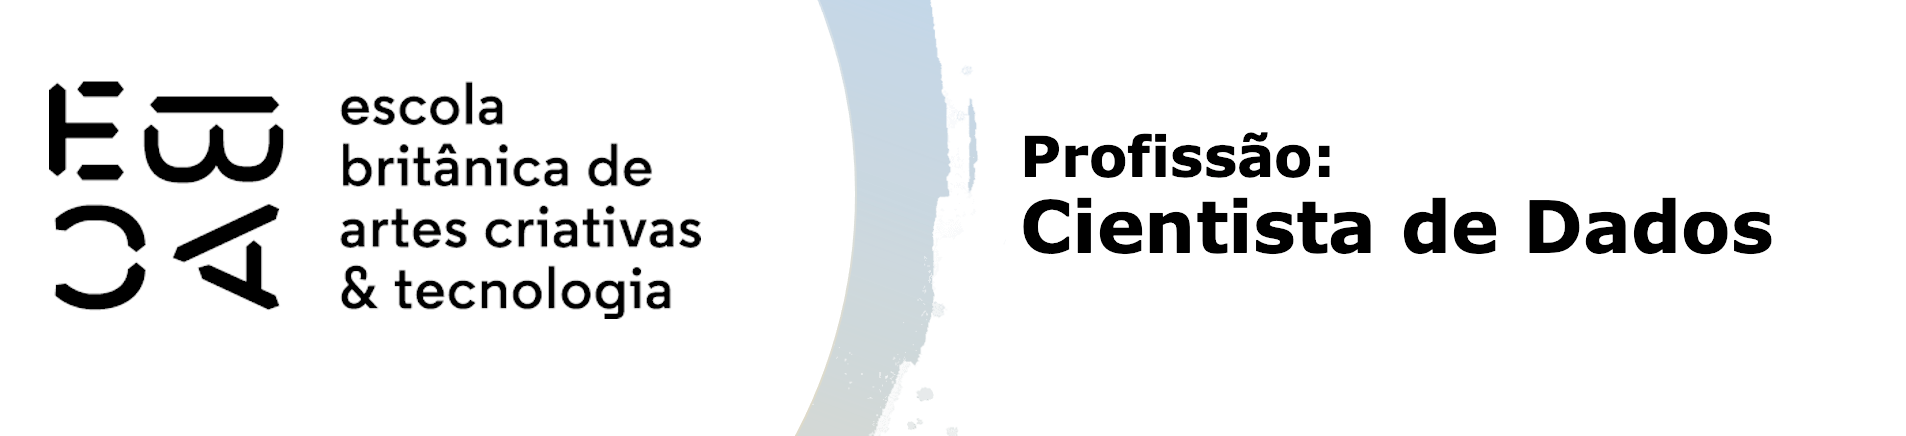

# Métodos hierárquicos de agrupamento - Tarefa

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

import scipy.cluster.hierarchy as shc

In [2]:
# Importando a base
peng = sns.load_dataset('penguins')
peng.index.name='id'

In [3]:
peng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


## 1) Repetindo o que fizemos em aula

Primeiramente vamos repetir o que fizemos em aula com a base de pinguins.

1. Selecione as variáveis quantitativas da base de pinguins
2. Elimine valores faltantes
3. Padronize as variáveis para média zero e desvio padrão 1
4. Faça um agrupamento hierárquico dividindo essa base em 3 grupos
5. Faça o Dendrograma

In [4]:
# Há 2 valores faltantes em cada coluna
peng = peng.dropna()
peng.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


In [5]:
# As variáveis quantitativas do dataframe são as de index 2 a 5, nas informações encontradas anteriormente
peng_num = peng.drop(["species", "island", "sex"], axis = 1)
peng_num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bill_length_mm     333 non-null    float64
 1   bill_depth_mm      333 non-null    float64
 2   flipper_length_mm  333 non-null    float64
 3   body_mass_g        333 non-null    float64
dtypes: float64(4)
memory usage: 13.0 KB


In [6]:
# Padronização dos valores pelo utilizando a StandardScaler
pad = StandardScaler()
peng_pad = pad.fit_transform(peng_num)

In [7]:
# Agrupamaneto em 3 clusters
clus = AgglomerativeClustering(linkage="complete", distance_threshold = None, n_clusters=3)

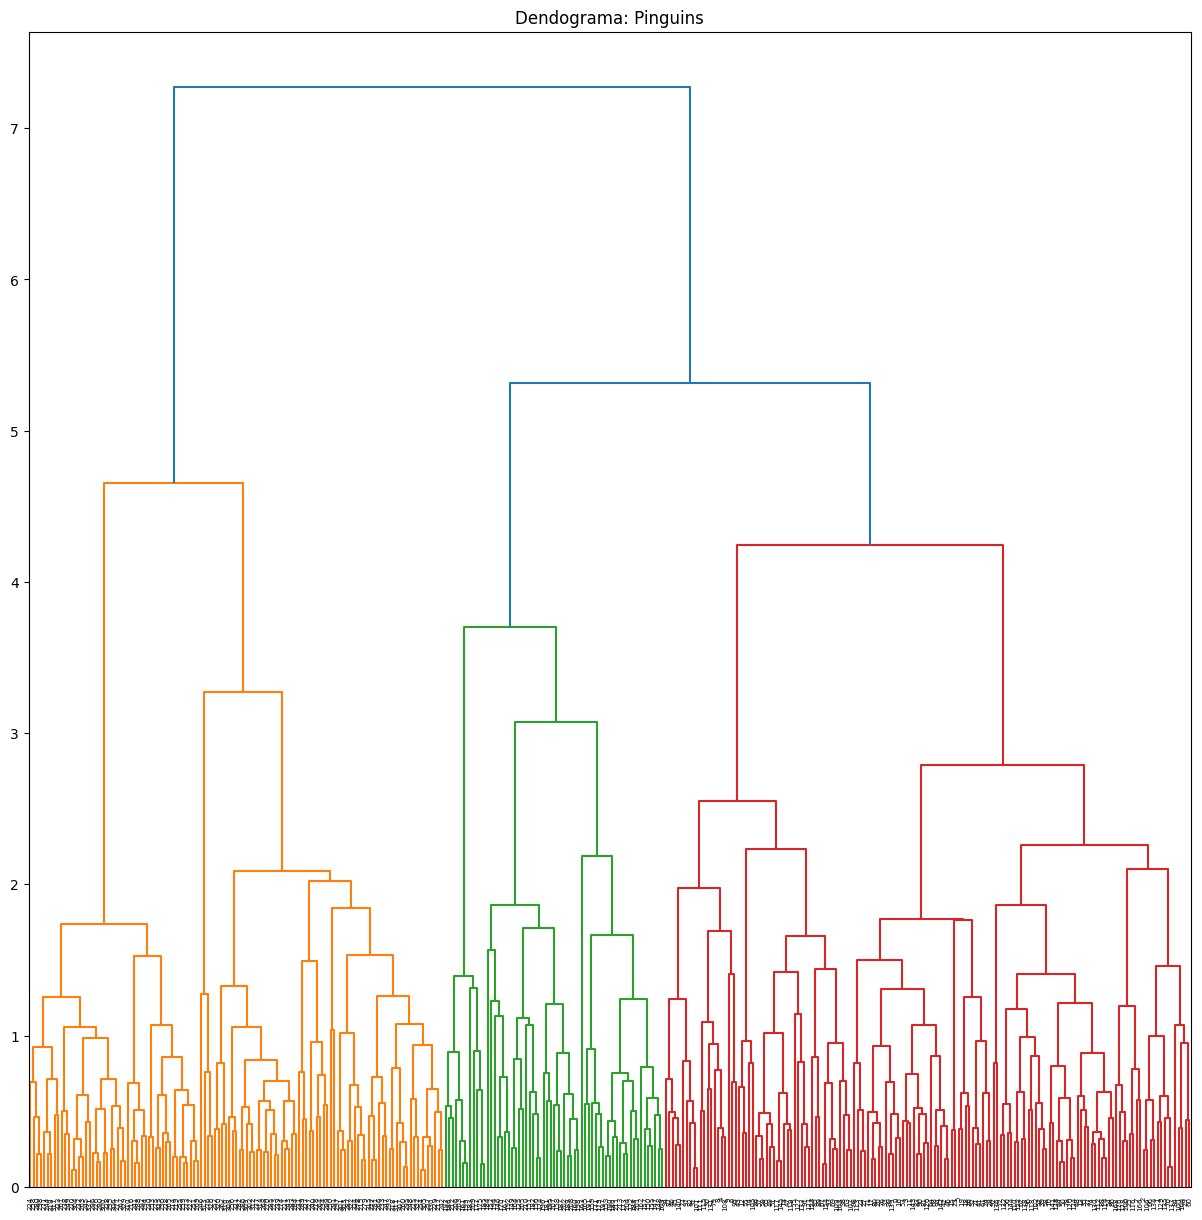

In [8]:
# Desenho do dendograma
plt.figure(figsize=(15, 15))

plt.title("Dendograma: Pinguins")

dend = shc.dendrogram(shc.linkage(peng_pad, method = "complete"))

## 2) Avalie os grupos

Descreva os grupos:

- Quantos pinguins de cada espécie há em cada grupo?
- Descreva as variáveis quantitativas de cada grupo com as técnicas que você preferir.

In [9]:
labels = clus.fit_predict(peng_pad)
peng["cluster"] = labels

pd.crosstab(peng["species"], peng["cluster"])

cluster,0,1,2
species,,,
Adelie,0,145,1
Chinstrap,0,6,62
Gentoo,119,0,0


In [10]:
peng_num["cluster"] = labels
peng_num.groupby(["cluster"]).agg(["mean", "var", "std"])

bill_length_mm                     bill_depth_mm                      \
                  mean       var       std          mean       var       std   
cluster                                                                        
0            47.568067  9.647955  3.106116     14.996639  0.972192  0.985998   
1            38.958278  7.478181  2.734626     18.297351  1.505326  1.226917   
2            49.306349  8.734798  2.955469     18.546032  1.188008  1.089958   

        flipper_length_mm                       body_mass_g                 \
                     mean        var       std         mean            var   
cluster                                                                      
0              217.235294  43.367896  6.585431  5092.436975  251478.332859   
1              189.947020  41.743841  6.460947  3696.357616  212061.644592   
2              196.650794  45.714798  6.761272  3758.730159  136233.038914   

                     
                std  
cluster              
0        501.476154  
1        460.501514  
2        369.097601

Percebemos que as funções explicativas seguem valores semelhantes para ambas as variáveis e grupos.

## 3) Alterando o agrupamento

O Dendrogarma sugere que podemem haver grupos interessantes se solicitarmos mais que 3 grupos. Se quisermos testar o agrupamento com mais de 3 grupos, quantos grupos o Dendrograma te sugere? (Dica: não faça mais que 6 grupos).

- Faça o agrupamento hierárquico semelhante ao anterior, mas com o número de grupos que você escolheu.
- Analise esses agrupamentos
    - Quantos pinguins de cada espécie há em cada grupo?
    - Quantos pinguins de cada espécie machos e fêmeas há em cada grupo?
- Na sua opinião, o agrupamento capturou algum padrão natural dos dados? Qual?

Sugiro com 6 grupos, pensando que os grupos laranja e vermelho, no dendrograma, são largos e poderiamos dividir em dois, entretanto a última divisão do vermelho também é mais larga e essa também poderiamos dividir em dois ficando: <br>laranja = 2 <br>
              verde = 1<br>
              vermelho = 3

In [13]:
# Agrupamaneto em 6 clusters
clus_6 = AgglomerativeClustering(linkage="complete", distance_threshold = None, n_clusters=6)

labels_6 = clus_6.fit_predict(peng_pad)

peng_6 = peng.copy()
peng_6["cluster"] = labels_6

pd.crosstab([peng_6["species"], peng_6["sex"]], peng_6["cluster"], margins = True, margins_name = "Total")

cluster            0   1   2   3   4   5  Total
species   sex                                  
Adelie    Female   0   0  72   0   1   0     73
          Male     0   1  20   0  52   0     73
Chinstrap Female   0  28   5   0   1   0     34
          Male     0  22   0   0   0  12     34
Gentoo    Female   9   0   0  49   0   0     58
          Male    61   0   0   0   0   0     61
Total             70  51  97  49  54  12    333

Podemos observar que, com o aumento no número de clusters, agora há dois clusters para cada espécie. A espécie Gentoo continua sendo bem classificada, sem confusão com as outras duas. No entanto, ao considerar as espécies Adelie e Chinstrap, ainda persiste uma confusão numericamente similar à observada quando o estudo era realizado com três clusters.